In [1]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [2]:
# import wewenętrznej bazy danych
import sqlite3

In [3]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [4]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [6]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [7]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [8]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Campaigns", "Orders", "ZipCounty"]

In [9]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [11]:
selectCities = '''SELECT city,numorderlines,numunits from orders '''
citiesDF = pd.read_sql_query(selectCities, dbConnection)

In [21]:
onlyThreecities=citiesDF.loc[citiesDF["city"].isin(["NEW YORK", "WASHINGTON", "BROOKLYN"])]
onlyThreecities.head()

,city,numorderlines,numunits
14,BROOKLYN,1,1
21,NEW YORK,1,3
29,NEW YORK,1,1
33,NEW YORK,1,2
48,NEW YORK,1,1


In [14]:
%matplotlib inline
sns.set()

C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


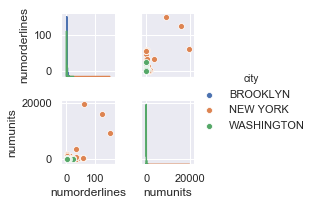

In [16]:
sns.pairplot(onlyThreecities, hue='city', height=1.5);

In [17]:
# Correlation heatmap

In [18]:
# calculate the correlation matrix
corr = onlyThreecities.corr()

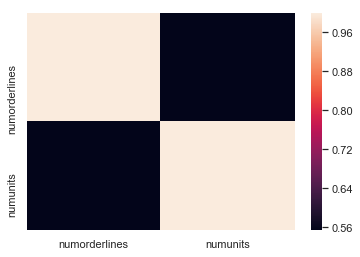

In [19]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
ordersSelect = '''SELECT * from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)

In [31]:
customersSelect = '''SELECT * from customers '''
customers = pd.read_sql_query(customersSelect, dbConnection)

In [33]:
customers.head()

,index,customerid,householdid,gender,firstname
0,0,174596,53949999,M,DANIEL
1,1,68239,49927024,M,JIM
2,2,10203,20914414,F,DONNA
3,3,174288,53957047,F,DIONE
4,4,68099,49927024,M,JIM


In [35]:
orders.head()

,index,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3
1,1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2
3,3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1


In [37]:
ordersCustomer = orders.merge(customers, on='customerid')

In [38]:
ordersCustomer.head()

,index_x,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,index_y,householdid,gender,firstname
0,0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3,33234,18991234,M,LOUIS
1,1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1,33235,36173848,M,ANTHONY
2,2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2,33236,36204911,None,MERRILL
3,3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1,33237,36173923,F,MARIA
4,4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1,33238,19227025,None,T.
